In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!ls /kaggle/input


isic-2019


In [6]:
import os
DATASET_PATH = "/kaggle/input/andrewmvd-isic-2019/"
os.listdir(DATASET_PATH)


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/andrewmvd-isic-2019/'

In [7]:
!ls /kaggle/input


isic-2019


In [8]:
import os
DATASET_PATH = "/kaggle/input/isic-2019"
os.listdir(DATASET_PATH)


['ISIC_2019_Training_GroundTruth.csv',
 'ISIC_2019_Training_Metadata.csv',
 'ISIC_2019_Training_Input']

In [13]:
TRAIN_INPUT = "/kaggle/input/isic-2019/ISIC_2019_Training_Input"
CSV_PATH    = "/kaggle/input/isic-2019/ISIC_2019_Training_GroundTruth.csv"


In [14]:
import pandas as pd

df = pd.read_csv(CSV_PATH)
df.head()


,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import os

base_out = "/kaggle/working/organized_dataset"
classes = ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']

for c in classes:
    os.makedirs(os.path.join(base_out, c), exist_ok=True)


In [21]:
label_map = {}
for _, row in df.iterrows():
    label = row.iloc[1:-1].idxmax()
    label_map[row['image']] = label


In [22]:
import shutil
from tqdm import tqdm

for fname in tqdm(os.listdir(TRAIN_INPUT)):
    img_id = fname.replace(".jpg", "")
    if img_id in label_map:
        label = label_map[img_id]
        shutil.copy(
            os.path.join(TRAIN_INPUT, fname),
            os.path.join(base_out, label, fname)
        )


100%|██████████| 1/1 [00:00<00:00, 10672.53it/s]


In [23]:
from sklearn.model_selection import train_test_split

split_base = "/kaggle/working/dataset_split"
train_dir = split_base + "/train"
val_dir   = split_base + "/val"
test_dir  = split_base + "/test"

for d in [train_dir, val_dir, test_dir]:
    for c in classes:
        os.makedirs(os.path.join(d, c), exist_ok=True)


In [25]:
for c in classes:
    folder = os.path.join(base_out, c)
    count = len(os.listdir(folder))
    print(c, "→", count, "images")


MEL → 0 images
NV → 0 images
BCC → 0 images
AK → 0 images
BKL → 0 images
DF → 0 images
VASC → 0 images
SCC → 0 images


In [26]:
TRAIN_INPUT = "/kaggle/input/isic-2019/ISIC_2019_Training_Input"
len(os.listdir(TRAIN_INPUT))


1

In [27]:
!ls /kaggle/input


isic-2019


In [29]:
!ls /kaggle/input/isic-2019


ISIC_2019_Training_GroundTruth.csv  ISIC_2019_Training_Metadata.csv
ISIC_2019_Training_Input


In [30]:
len(os.listdir("/kaggle/input/isic-2019/ISIC_2019_Training_Input"))


1

In [1]:
import os, shutil, random
from tqdm import tqdm
import pandas as pd

# CORRECT nested path to training images (as seen in your UI)
TRAIN_INPUT = "/kaggle/input/isic-2019/ISIC_2019_Training_Input/ISIC_2019_Training_Input"
CSV_PATH   = "/kaggle/input/isic-2019/ISIC_2019_Training_GroundTruth.csv"

print("Exists images folder?", os.path.exists(TRAIN_INPUT))
print("Example files:", os.listdir(TRAIN_INPUT)[:5])
print("CSV exists?", os.path.exists(CSV_PATH))
df = pd.read_csv(CSV_PATH)
print("CSV shape:", df.shape)
print("CSV columns:", list(df.columns))


Exists images folder? True
Example files: ['ISIC_0057312.jpg', 'ISIC_0014233_downsampled.jpg', 'ISIC_0059626.jpg', 'ISIC_0056156.jpg', 'ISIC_0030912.jpg']
CSV exists? True
CSV shape: (25331, 10)
CSV columns: ['image', 'MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']


In [2]:
# Build mapping image_id -> label (one-hot columns, skip UNK)
classes = ['MEL','NV','BCC','AK','BKL','DF','VASC','SCC']
label_map = {}

for _, row in df.iterrows():
    img_id = row['image']  # e.g. "ISIC_0000000"
    # find index of column with 1 among our classes
    # safety: if multiple 1s or none, prefer max
    class_cols = row[classes]
    if class_cols.sum() == 0:
        continue
    label = class_cols.idxmax()
    label_map[str(img_id)] = label

# Quick counts:
from collections import Counter
counts = Counter(label_map.values())
print("CSV label counts:", counts)
print("Total labeled images:", len(label_map))


CSV label counts: Counter({'NV': 12875, 'MEL': 4522, 'BCC': 3323, 'BKL': 2624, 'AK': 867, 'SCC': 628, 'VASC': 253, 'DF': 239})
Total labeled images: 25331


In [3]:
BASE_OUT = "/kaggle/working/organized_dataset"
os.makedirs(BASE_OUT, exist_ok=True)
for c in classes:
    os.makedirs(os.path.join(BASE_OUT, c), exist_ok=True)

print("Created class folders under", BASE_OUT)


Created class folders under /kaggle/working/organized_dataset


In [4]:
valid_exts = {".jpg",".jpeg",".png",".JPG",".JPEG",".PNG"}
copied = 0
skipped = 0

for fname in tqdm(os.listdir(TRAIN_INPUT), desc="Copying images"):
    name, ext = os.path.splitext(fname)
    if ext not in valid_exts:
        skipped += 1
        continue
    if name in label_map:
        dst_dir = os.path.join(BASE_OUT, label_map[name])
        shutil.copy(os.path.join(TRAIN_INPUT, fname), os.path.join(dst_dir, fname))
        copied += 1
    else:
        skipped += 1

print("Copied:", copied, "Skipped(not labeled or ext):", skipped)
# sanity check counts per class
for c in classes:
    print(c, "->", len(os.listdir(os.path.join(BASE_OUT, c))), "files")


Copying images: 100%|██████████| 25333/25333 [06:03<00:00, 69.69it/s]

Copied: 25331 Skipped(not labeled or ext): 2
MEL -> 4522 files
NV -> 12875 files
BCC -> 3323 files
AK -> 867 files
BKL -> 2624 files
DF -> 239 files
VASC -> 253 files
SCC -> 628 files


In [5]:
from sklearn.model_selection import train_test_split

SPLIT_BASE = "/kaggle/working/dataset_split"
train_dir = os.path.join(SPLIT_BASE, "train")
val_dir   = os.path.join(SPLIT_BASE, "val")
test_dir  = os.path.join(SPLIT_BASE, "test")

for d in [train_dir, val_dir, test_dir]:
    for c in classes:
        os.makedirs(os.path.join(d, c), exist_ok=True)

for c in classes:
    src = os.path.join(BASE_OUT, c)
    files = sorted(os.listdir(src))
    n = len(files)
    if n == 0:
        print("Warning: class", c, "has 0 files — skipping.")
        continue
    if n < 5:
        # keep tiny classes in train
        for f in files:
            shutil.copy(os.path.join(src,f), os.path.join(train_dir, c, f))
        continue

    # stratified-like: 70% train, 15% val, 15% test
    train_files, temp = train_test_split(files, test_size=0.30, random_state=42)
    val_files, test_files = train_test_split(temp, test_size=0.50, random_state=42)

    for f in train_files:
        shutil.copy(os.path.join(src,f), os.path.join(train_dir,c,f))
    for f in val_files:
        shutil.copy(os.path.join(src,f), os.path.join(val_dir,c,f))
    for f in test_files:
        shutil.copy(os.path.join(src,f), os.path.join(test_dir,c,f))

# Final counts
print("Split complete — counts:")
for d in [train_dir, val_dir, test_dir]:
    total = sum(len(os.listdir(os.path.join(d,c))) for c in classes)
    print(d, "->", total, "files")


Split complete — counts:
/kaggle/working/dataset_split/train -> 17728 files
/kaggle/working/dataset_split/val -> 3799 files
/kaggle/working/dataset_split/test -> 3804 files


In [6]:
for c in classes:
    print(c, "train:", len(os.listdir(os.path.join(train_dir,c))),
          "val:", len(os.listdir(os.path.join(val_dir,c))),
          "test:", len(os.listdir(os.path.join(test_dir,c))))


MEL train: 3165 val: 678 test: 679
NV train: 9012 val: 1931 test: 1932
BCC train: 2326 val: 498 test: 499
AK train: 606 val: 130 test: 131
BKL train: 1836 val: 394 test: 394
DF train: 167 val: 36 test: 36
VASC train: 177 val: 38 test: 38
SCC train: 439 val: 94 test: 95


In [7]:
import tensorflow as tf
tf.keras.mixed_precision.set_global_policy('mixed_float16')
IMG_SIZE = (224,224)
BATCH = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=IMG_SIZE, batch_size=BATCH, label_mode='categorical'
).prefetch(tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir, image_size=IMG_SIZE, batch_size=BATCH, label_mode='categorical'
).prefetch(tf.data.AUTOTUNE)


2025-12-11 16:57:23.358219: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1765472243.538583      47 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1765472243.591191      47 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Found 17728 files belonging to 8 classes.


I0000 00:00:1765472258.199131      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1765472258.199757      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Found 3799 files belonging to 8 classes.


In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Hide TensorFlow warnings

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models


In [10]:
TRAIN = "/kaggle/input/isic-2019-organized/dataset_split/train"
VAL   = "/kaggle/input/isic-2019-organized/dataset_split/val"

IMG_SIZE = (224, 224)
BATCH = 32


In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    label_mode='categorical'
).prefetch(tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    label_mode='categorical'
).prefetch(tf.data.AUTOTUNE)


NotFoundError: Could not find directory /kaggle/input/isic-2019-organized/dataset_split/train

In [12]:
!ls /kaggle/working


dataset_split  organized_dataset


In [13]:
!ls /kaggle/working/dataset_split


test  train  val


In [16]:
TRAIN = "/kaggle/working/dataset_split/train"
VAL   = "/kaggle/working/dataset_split/val"


In [17]:
IMG_SIZE = (224, 224)
BATCH = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    label_mode='categorical'
).prefetch(tf.data.AUTOTUNE)

val_ds = tf.keras.utils.image_dataset_from_directory(
    VAL,
    image_size=IMG_SIZE,
    batch_size=BATCH,
    label_mode='categorical'
).prefetch(tf.data.AUTOTUNE)


Found 17728 files belonging to 8 classes.
Found 3799 files belonging to 8 classes.


In [18]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

base = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(224, 224, 3)
)
base.trainable = False  # freeze backbone

num_classes = train_ds.element_spec[1].shape[-1]

model = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax', dtype='float32')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,379,563 (16.71 MB)

 Trainable params: 329,992 (1.26 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

checkpoint = ModelCheckpoint(
    "/kaggle/working/best_skinAI_model.h5",
    monitor="val_accuracy",
    save_best_only=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.3,
    patience=2,
    verbose=1,
    min_lr=1e-6
)

early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
    verbose=1
)


In [20]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=8,          # Kaggle GPUs are fast — can increase to 12 if needed
    callbacks=[checkpoint, reduce_lr, early_stop],
    verbose=1
)


Epoch 1/8


I0000 00:00:1765473403.389332     134 service.cc:148] XLA service 0x7e1c30002580 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765473403.390176     134 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1765473403.390287     134 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1765473405.581301     134 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/554 ━━━━━━━━━━━━━━━━━━━━ 17s 32ms/step - accuracy: 0.2901 - loss: 1.8823 

I0000 00:00:1765473417.930087     134 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5975 - loss: 1.1403
Epoch 1: val_accuracy improved from -inf to 0.67176, saving model to /kaggle/working/best_skinAI_model.h5


554/554 ━━━━━━━━━━━━━━━━━━━━ 99s 132ms/step - accuracy: 0.5975 - loss: 1.1401 - val_accuracy: 0.6718 - val_loss: 0.9116 - learning_rate: 0.0010
Epoch 2/8
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6654 - loss: 0.9180
Epoch 2: val_accuracy improved from 0.67176 to 0.69281, saving model to /kaggle/working/best_skinAI_model.h5


554/554 ━━━━━━━━━━━━━━━━━━━━ 60s 108ms/step - accuracy: 0.6654 - loss: 0.9179 - val_accuracy: 0.6928 - val_loss: 0.8481 - learning_rate: 0.0010
Epoch 3/8
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6884 - loss: 0.8457
Epoch 3: val_accuracy improved from 0.69281 to 0.70598, saving model to /kaggle/working/best_skinAI_model.h5


554/554 ━━━━━━━━━━━━━━━━━━━━ 59s 107ms/step - accuracy: 0.6884 - loss: 0.8457 - val_accuracy: 0.7060 - val_loss: 0.8235 - learning_rate: 0.0010
Epoch 4/8
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7046 - loss: 0.8028
Epoch 4: val_accuracy improved from 0.70598 to 0.70940, saving model to /kaggle/working/best_skinAI_model.h5


554/554 ━━━━━━━━━━━━━━━━━━━━ 59s 107ms/step - accuracy: 0.7046 - loss: 0.8028 - val_accuracy: 0.7094 - val_loss: 0.7951 - learning_rate: 0.0010
Epoch 5/8
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7218 - loss: 0.7578
Epoch 5: val_accuracy improved from 0.70940 to 0.71414, saving model to /kaggle/working/best_skinAI_model.h5


554/554 ━━━━━━━━━━━━━━━━━━━━ 59s 107ms/step - accuracy: 0.7218 - loss: 0.7578 - val_accuracy: 0.7141 - val_loss: 0.7864 - learning_rate: 0.0010
Epoch 6/8
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7327 - loss: 0.7294
Epoch 6: val_accuracy improved from 0.71414 to 0.71598, saving model to /kaggle/working/best_skinAI_model.h5


554/554 ━━━━━━━━━━━━━━━━━━━━ 60s 107ms/step - accuracy: 0.7327 - loss: 0.7294 - val_accuracy: 0.7160 - val_loss: 0.7786 - learning_rate: 0.0010
Epoch 7/8
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.7442 - loss: 0.7025
Epoch 7: val_accuracy improved from 0.71598 to 0.72888, saving model to /kaggle/working/best_skinAI_model.h5


554/554 ━━━━━━━━━━━━━━━━━━━━ 59s 107ms/step - accuracy: 0.7442 - loss: 0.7025 - val_accuracy: 0.7289 - val_loss: 0.7638 - learning_rate: 0.0010
Epoch 8/8
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7498 - loss: 0.6777
Epoch 8: val_accuracy did not improve from 0.72888
554/554 ━━━━━━━━━━━━━━━━━━━━ 59s 106ms/step - accuracy: 0.7498 - loss: 0.6777 - val_accuracy: 0.7289 - val_loss: 0.7559 - learning_rate: 0.0010
Restoring model weights from the end of the best epoch: 8.


In [22]:
# 1. Data augmentation block
from tensorflow.keras import layers

data_aug = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.10),
    layers.RandomZoom(0.10),
    layers.RandomContrast(0.10),
])

# 2. Apply augmentation to training dataset
train_ds_aug = train_ds.map(
    lambda x, y: (data_aug(x, training=True), y)
).prefetch(tf.data.AUTOTUNE)

# 3. Unfreeze deeper layers for strong fine-tuning
for layer in model.layers[0].layers[-80:]:
    layer.trainable = True

# 4. Recompile model with lower LR
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 5. Train for 4 more epochs
history_aug_ft = model.fit(
    train_ds_aug,
    validation_data=val_ds,
    epochs=4,
    callbacks=[checkpoint, reduce_lr, early_stop],
    verbose=1
)


Epoch 1/4
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - accuracy: 0.6190 - loss: 1.1570
Epoch 1: val_accuracy did not improve from 0.72888
554/554 ━━━━━━━━━━━━━━━━━━━━ 358s 568ms/step - accuracy: 0.6190 - loss: 1.1569 - val_accuracy: 0.6744 - val_loss: 0.9254 - learning_rate: 1.0000e-05
Epoch 2/4
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 528ms/step - accuracy: 0.6679 - loss: 0.9376
Epoch 2: val_accuracy did not improve from 0.72888
554/554 ━━━━━━━━━━━━━━━━━━━━ 303s 547ms/step - accuracy: 0.6679 - loss: 0.9376 - val_accuracy: 0.6849 - val_loss: 0.8836 - learning_rate: 1.0000e-05
Epoch 3/4
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 520ms/step - accuracy: 0.6823 - loss: 0.8894
Epoch 3: val_accuracy did not improve from 0.72888
554/554 ━━━━━━━━━━━━━━━━━━━━ 299s 538ms/step - accuracy: 0.6823 - loss: 0.8893 - val_accuracy: 0.6926 - val_loss: 0.8550 - learning_rate: 1.0000e-05
Epoch 4/4
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 524ms/step - accuracy: 0.6938 - loss: 0.8359
Epoch 4: val_accuracy did not improve from 0.72888
5

In [21]:
# Unfreeze last 20 layers of EfficientNet
for layer in model.layers[0].layers[-20:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5,   # ← THIS is enough
    callbacks=[checkpoint, reduce_lr, early_stop],
    verbose=1
)


Epoch 1/5
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5797 - loss: 1.6740
Epoch 1: val_accuracy did not improve from 0.72888
554/554 ━━━━━━━━━━━━━━━━━━━━ 97s 125ms/step - accuracy: 0.5798 - loss: 1.6736 - val_accuracy: 0.6618 - val_loss: 1.1135 - learning_rate: 1.0000e-05
Epoch 2/5
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6581 - loss: 1.0770
Epoch 2: val_accuracy did not improve from 0.72888
554/554 ━━━━━━━━━━━━━━━━━━━━ 59s 107ms/step - accuracy: 0.6581 - loss: 1.0769 - val_accuracy: 0.6773 - val_loss: 0.9721 - learning_rate: 1.0000e-05
Epoch 3/5
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6785 - loss: 0.9302
Epoch 3: val_accuracy did not improve from 0.72888
554/554 ━━━━━━━━━━━━━━━━━━━━ 59s 107ms/step - accuracy: 0.6785 - loss: 0.9302 - val_accuracy: 0.6873 - val_loss: 0.9064 - learning_rate: 1.0000e-05
Epoch 4/5
554/554 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.7009 - loss: 0.8419
Epoch 4: val_accuracy did not improve from 0.72888
554/554 

In [23]:
TEST = "/kaggle/working/dataset_split/test"

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST,
    image_size=(224,224),
    batch_size=32,
    label_mode='categorical'
).prefetch(tf.data.AUTOTUNE)


Found 3804 files belonging to 8 classes.


In [28]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models

num_classes = 8

base = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224,224,3))
base.trainable = True

model_new = models.Sequential([
    base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax', dtype='float32')
])


In [29]:
model_new.load_weights(MODEL_PATH)


ValueError: Shape mismatch in layer #0 (named efficientnetb0)for weight stem_conv/kernel. Weight expects shape (3, 3, 3, 32). Received saved weight with shape (3,)

In [30]:
model.save("/kaggle/working/best_skinAI_model.keras")


In [31]:
!ls -lh /kaggle/working


total 92M
-rw-r--r--  1 root root  20M Dec 11 17:24 best_skinAI_model.h5
-rw-r--r--  1 root root  72M Dec 11 18:40 best_skinAI_model.keras
drwxr-xr-x  5 root root 4.0K Dec 11 16:54 dataset_split
drwxr-xr-x 10 root root 4.0K Dec 11 16:45 organized_dataset


In [32]:

model.save("/kaggle/working/best_skinAI_model.keras")


In [33]:
!ls -lh /kaggle/working


total 92M
-rw-r--r--  1 root root  20M Dec 11 17:24 best_skinAI_model.h5
-rw-r--r--  1 root root  72M Dec 11 18:42 best_skinAI_model.keras
drwxr-xr-x  5 root root 4.0K Dec 11 16:54 dataset_split
drwxr-xr-x 10 root root 4.0K Dec 11 16:45 organized_dataset


In [34]:
model = tf.keras.models.load_model("/kaggle/working/best_skinAI_model.keras")


In [35]:
import tensorflow as tf

TEST_DIR = "/kaggle/working/dataset_split/test"
IMG_SIZE = (224, 224)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=32,
    shuffle=False,
    label_mode='categorical'
).prefetch(tf.data.AUTOTUNE)

class_names = test_ds.class_names
class_names


Found 3804 files belonging to 8 classes.


AttributeError: '_PrefetchDataset' object has no attribute 'class_names'

In [36]:
test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=32,
    shuffle=False,
    label_mode='categorical'
)

class_names = test_ds_raw.class_names   # GET CLASS NAMES HERE ✔

test_ds = test_ds_raw.prefetch(tf.data.AUTOTUNE)


Found 3804 files belonging to 8 classes.


In [37]:
import tensorflow as tf

TEST_DIR = "/kaggle/working/dataset_split/test"
IMG_SIZE = (224, 224)

# Load first (without prefetch) to access class_names
test_ds_raw = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    image_size=IMG_SIZE,
    batch_size=32,
    shuffle=False,
    label_mode='categorical'
)

class_names = test_ds_raw.class_names
print("Classes:", class_names)

# Now add prefetch
test_ds = test_ds_raw.prefetch(tf.data.AUTOTUNE)


Found 3804 files belonging to 8 classes.
Classes: ['AK', 'BCC', 'BKL', 'DF', 'MEL', 'NV', 'SCC', 'VASC']


In [38]:
import numpy as np

y_true = []
y_pred = []

for batch_images, batch_labels in test_ds:
    preds = model.predict(batch_images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(batch_labels.numpy(), axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("Predictions completed.")


Predictions completed.


In [39]:
import sklearn.metrics as skm

print(skm.classification_report(
    y_true, 
    y_pred, 
    target_names=class_names,
    digits=4
))


              precision    recall  f1-score   support

          AK     0.4426    0.2061    0.2812       131
         BCC     0.6573    0.7535    0.7021       499
         BKL     0.4474    0.5508    0.4937       394
          DF     0.5000    0.0556    0.1000        36
         MEL     0.6642    0.5302    0.5897       679
          NV     0.8177    0.8778    0.8467      1932
         SCC     0.3889    0.1474    0.2137        95
        VASC     0.7000    0.5526    0.6176        38

    accuracy                         0.7132      3804
   macro avg     0.5773    0.4592    0.4806      3804
weighted avg     0.7031    0.7132    0.7007      3804



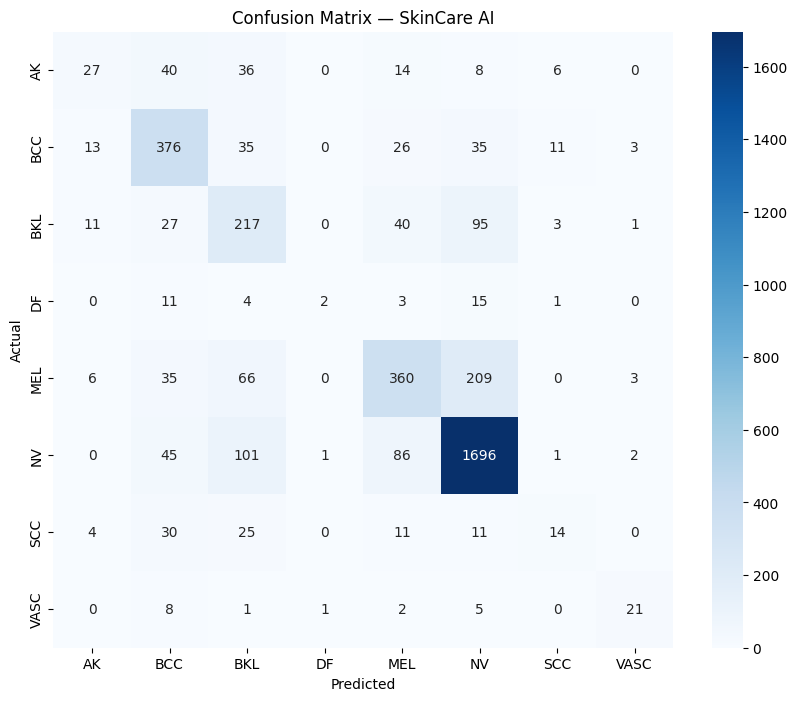

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = skm.confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, 
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix — SkinCare AI")
plt.show()


In [41]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def get_gradcam_heatmap(model, img_array, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        class_idx = tf.argmax(predictions[0])
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)[0]
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))

    conv_outputs = conv_outputs[0]

    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap).numpy()

    # Normalize heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap = heatmap / (np.max(heatmap) + 1e-8)

    return heatmap


In [42]:
last_conv = None

for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv = layer.name

print("Last Conv Layer:", last_conv)


Last Conv Layer: None


In [43]:
import random
from tensorflow.keras.preprocessing import image

# Choose random class
rand_class = random.choice(class_names)
folder = f"{TEST_DIR}/{rand_class}"

# Choose random image
rand_image = random.choice(os.listdir(folder))
img_path = f"{folder}/{rand_image}"

print("Selected Image:", img_path)

# Load image
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array_expanded = np.expand_dims(img_array, axis=0)

# Preprocess for EfficientNet
img_pre = tf.keras.applications.efficientnet.preprocess_input(img_array_expanded)

# Generate heatmap
heatmap = get_gradcam_heatmap(model, img_pre, last_conv)

# Resize heatmap to original image
heatmap_resized = cv2.resize(heatmap, (IMG_SIZE[0], IMG_SIZE[1]))
heatmap_resized = np.uint8(255 * heatmap_resized)

# Apply heatmap color
heatmap_color = cv2.applyColorMap(heatmap_resized, cv2.COLORMAP_JET)

# Blend with original
superimposed_img = cv2.addWeighted(img_array.astype('uint8'), 0.6, heatmap_color, 0.4, 0)

# Plot results
plt.figure(figsize=(12,6))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img)
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Grad-CAM Heatmap")
plt.imshow(heatmap, cmap='jet')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Overlay")
plt.imshow(superimposed_img)
plt.axis("off")

plt.show()


Selected Image: /kaggle/working/dataset_split/test/VASC/ISIC_0032932.jpg


ValueError: Provide either a layer name or layer index at `get_layer`.

In [44]:
test_loss, test_acc = model.evaluate(test_ds, verbose=1)

print("\n============================")
print("Final Test Accuracy :", test_acc)
print("Final Test Loss     :", test_loss)
print("============================")


119/119 ━━━━━━━━━━━━━━━━━━━━ 24s 123ms/step - accuracy: 0.6152 - loss: 1.0688

Final Test Accuracy : 0.7131966352462769
Final Test Loss     : 0.8110145330429077


In [45]:
import numpy as np
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(np.argmax(labels.numpy(), axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

print("\n📌 CLASSIFICATION REPORT\n")
print(classification_report(
    y_true, 
    y_pred, 
    target_names=class_names,
    digits=4
))



📌 CLASSIFICATION REPORT

              precision    recall  f1-score   support

          AK     0.4426    0.2061    0.2812       131
         BCC     0.6573    0.7535    0.7021       499
         BKL     0.4474    0.5508    0.4937       394
          DF     0.5000    0.0556    0.1000        36
         MEL     0.6642    0.5302    0.5897       679
          NV     0.8177    0.8778    0.8467      1932
         SCC     0.3889    0.1474    0.2137        95
        VASC     0.7000    0.5526    0.6176        38

    accuracy                         0.7132      3804
   macro avg     0.5773    0.4592    0.4806      3804
weighted avg     0.7031    0.7132    0.7007      3804



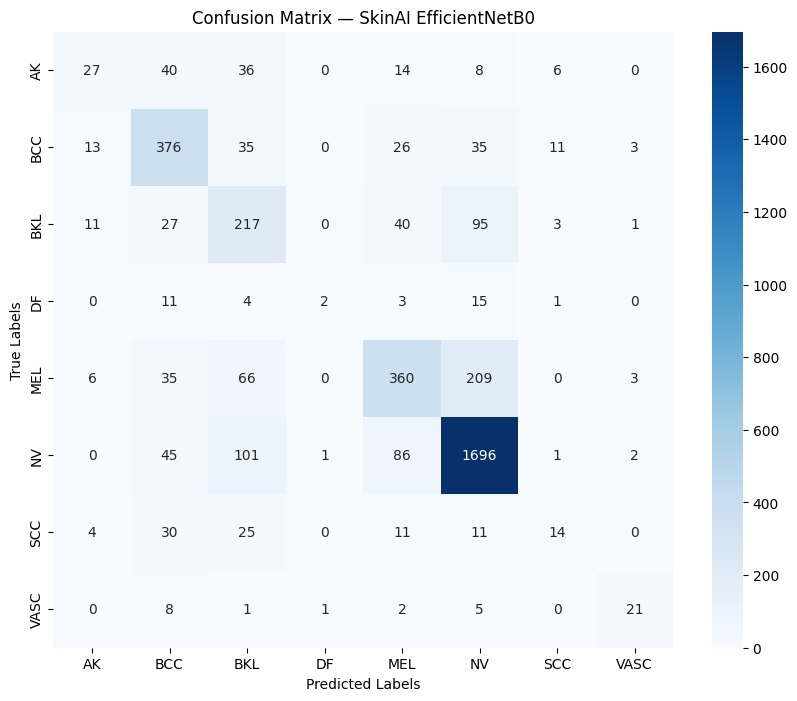

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix — SkinAI EfficientNetB0")
plt.show()


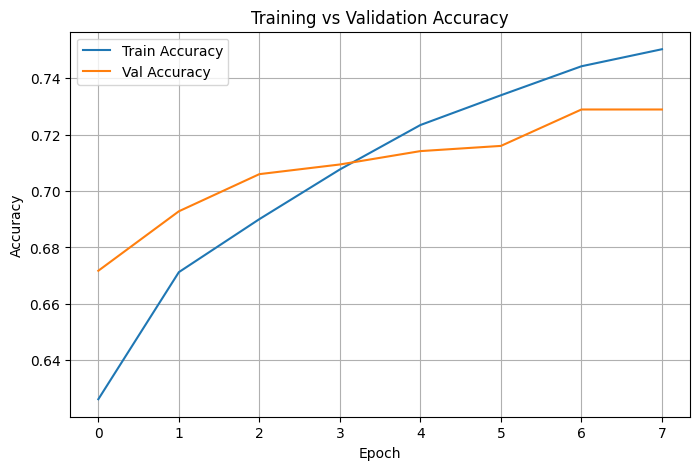

In [47]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')

plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


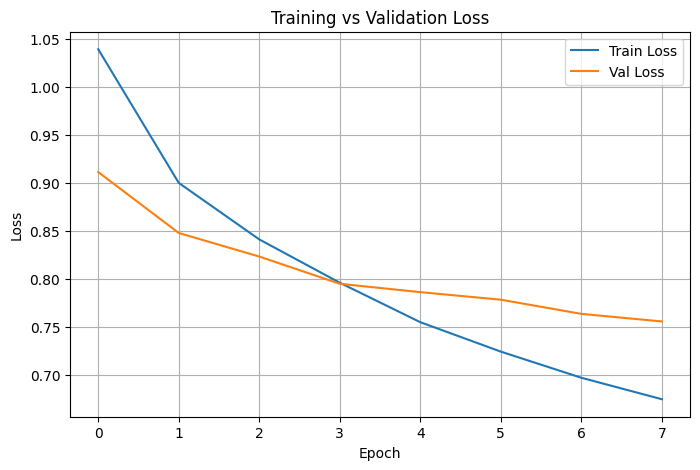

In [48]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')

plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
report = classification_report(y_true, y_pred, target_names=class_names)
with open("classification_report.txt", "w") as f:
    f.write(report)
